# Credit Risk Prediction [Python]

## Business Use Case: Prediction of Credit Risk Class

## Description

From the data set provided below, we are going to train a classification model to accurately predict the good and bad credit risks. Obviously, misclassifying as good a credit risk when it is actually bad, is worse than doing the opposite, i.e. misclassifying as bad a credit risk when it is actually good. In this example, this behavior is quantified by the provided **cost matrix** below:

### Cost Matrix


\                    |**Predicted**
---------------------|-----------------------------------------
**Actual**           |**Good (`'1'`) [P]**|** Bad (`'2'`) [N]**
**Good (`'1'`) [P]** |**0** [TP]          |**1** [FN]
**Bad (`'2'`) [N]**  |**5** [FP]          |**0** [TN]

**Rows:** actual classification

**Columns:** predicted classification

(**`'1'`** = **Good Credit Risk**, **`'2'`** = **Bad Credit Risk**)

Note, that we have consider here the **Good Credit Risk (`'1'`)**, as the **positive class [P]**.


## Data set

The data set **`'credit_data.csv'`** contains 20 attributes of personal, loan, and credit history details, which are used to associate a customer with a **good (`'1'`)** or **bad credit risk (`'2'`)**.

The file is in a comma separated format and contains the variables below:

**`Attribute 1`: Status of existing checking account [string type, as ordinal categorical (in ascending order)]**
* `'none'` (no checking account)
* `'overdraft'`
* `'adequate'`
* `'good'`

** `Attribute 2`: Duration in months (numerical)**
	      
**`Attribute 3:` Credit history [string type, as ordinal categorical (in ascending order)]**
* `'none'`: no credits taken / all credits paid back duly
* `'Paid-Off'`: all credits at this bank paid back duly
* `'Serviced'`: existing credits paid back duly till now
* `'Delayed'`: delay in paying off in the past
* `'Critical'`: critical account / other credits existing (not at this bank)

**`Attribute 4`: Loan purpose (string type, as nominal categorical)**
* `'car (new)'`
* `'car (used)'`
* `'furniture/equipment'`
* `'radio/television'`
* `'domestic appliances'`
* `'repairs'`
* `'education'`
* `'vacation'`
* `'retraining'`
* `'business'`
* `'others'`

**`Attribute 5`:  Credit amount (EUR) (float type, numerical)**
	      
**`Attibute 6`: savings in account/bonds (EUR) (float type, numerical)**

** `Attribute 7`: consecutive employment (years) [string type, as ordinal categorical (in ascending order)]**
* `'E0'`: unemployed
* `'E1'`: less than 1 year
* `'E4'`: in [1,4) years  
* `'E7'`: in [4,7) years
* `'E7+'`: greater/equal 7 years

**`Attribute 8`: Installment rate in percentage of disposable income [float type, numerical (percentage)]**
	      
**`Attribute 9`: Personal status and sex (string type, as nominal categorical)**
* `'M0'`: male & single
* `'M1'`: male & married/widowed
* `'M2'`: male & divorced/separated
* `'F0'`: female & single
* `'F1'`: female & divorced/separated/married

**`Attribute 10`: Other debtors / guarantors (string type, as nominal categorical)**
* `'co-applicant'`
* `'guarantor'`
* `'none'`

**`Attribute 11`: Present residence since [integer type, numerical (years)]**
	      
**`Attribute 12`: Property (string type, as nominal categorical)**
* `'real estate'`
* `'building society savings agreement / life-insurance'`
* `'car / other'`
* `'unknown / no-property'`

**`Attribute 13:` Age in years (integer type, numerical)**
	      
**`Attribute 14`: Other installment plans (string type, as nominal categorical)**
* `'bank'`
* `'stores'`
* `'none'`

**`Attribute 15`: Housing [string type, as ordinal categorical (in ascending order)]**
* `'guest'`
* `'rent'`
* `'own'`

**`Attribute 16`: Number of existing credits at this bank (integer type, numerical)**
              
**`Attribute 17`: Work experience [string type, as ordinal categorical (in descending order)]**
* `'A'`: management  /self-employed / highly qualified employee / officer
* `'B'`: skilled employee / official
* `'C''`: unskilled - resident
* `'D'`: unemployed/ unskilled  - non-resident

**`Attribute 18`: Number of people being liable to provide maintenance for (integer type, numerical)**
	      
**`Attribute 19`: Telephone Exists (string type, as nominal categorical)**
* `'yes'` (Registered under the customers name)
* `'no'`

**`Attribute 20`: foreign worker (string type, as nominal categorical)**
* `'yes'`
* `'no'`

## 1. Loading Libraries and User-defined Functions

In [1]:
# Required Libraries
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.preprocessing import LabelEncoder

from __future__ import print_function
np.set_printoptions(precision=4, suppress=True)

from matplotlib import pyplot as plt
import matplotlib as mlb
import seaborn as sns

In [2]:
# Matplotlib/Seaborn Parameters
mlb.style.use('seaborn-whitegrid')
sns.set_context('talk')
%matplotlib inline

mlb.rcParams['figure.titleweight'] = 'bold'
mlb.rcParams['axes.labelweight'] = 'bold'
mlb.rcParams['axes.titleweight'] = 'bold'
mlb.rcParams['figure.figsize'] = [10,6]

In [3]:
# User-defined Functions [Loaded from: /media/ML_HOME/ML-Code_Base (through a .pth file)]
from visualization_helper_functions import freq_tables

## 2. Loading Credit Data / Validity Checks

First, we load the credit data set, **`'credit_data.csv'`**, and change the attribute names to shorter ones for our convenience. Note, that no **`'None'`** values exist, or any other problems.

In [4]:
# Load the Credit Data Set, "credit_data.csv"
credit_data_df = pd.read_csv('./credit_data.csv')

In [5]:
credit_data_df.head()

,status of existing checking account,loan duration (months),credit history,loan purpose,credit amount (EUR),savings in account/bonds (EUR),consecutive employment (years),installment rate (% of disposable income),sex & personal status,other debtors/guarantors,...,property type,age (years),other installment plans,housing type,existing credits at bank,work experience,No. of people liable,phone exist,foreign worker,credit risk
0,overdraft,6,Critical,radio / television,1169.54,0.00,E7+,4.0,M0,none,...,real estate,67,none,own,2,B,1,yes,yes,1
1,adequate,48,Serviced,radio / television,5951.76,17.75,E4,2.0,F1,none,...,real estate,22,none,own,1,B,1,no,yes,2
2,none,12,Critical,education,2096.53,38.90,E7,2.0,M0,none,...,real estate,49,none,own,1,C,2,no,yes,1
3,overdraft,42,Serviced,furniture / equipment,7882.18,11.13,E7,2.0,M0,guarantor,...,building society saving agreement / life-insur...,45,none,guest,1,B,2,no,yes,1
4,overdraft,24,Delayed,car (new),4870.38,72.33,E4,3.0,M0,none,...,unknown / no-property,53,none,guest,2,B,2,no,yes,2


In [6]:
# Change the attribute names to shorter ones for our convenience
colnames = ['checking_acc_status',
            'loan_duration',
            'credit_hist',
            'loan_purpose',
            'credit_amount',
            'savings',
            'consecutive_emp',
            'installment_rate',
            'sex_personal_status',
            'other_debtors_guarantors',
            'present_residence_since',
            'property_type',
            'age',
            'other_installment_plans',
            'housing_type',
            'credits_at_bank',
            'work_experience',
            'num_people_liable',
            'phone_exist',
            'foreign_worker',
            'credit_risk']

new_columns = {key:value for key, value in zip(list(credit_data_df.columns), colnames)}
credit_data_df.rename(columns=new_columns, inplace=True)

In [7]:
credit_data_df.dtypes

checking_acc_status          object
loan_duration                 int64
credit_hist                  object
loan_purpose                 object
credit_amount               float64
savings                     float64
consecutive_emp              object
installment_rate            float64
sex_personal_status          object
other_debtors_guarantors     object
present_residence_since       int64
property_type                object
age                           int64
other_installment_plans      object
housing_type                 object
credits_at_bank               int64
work_experience              object
num_people_liable             int64
phone_exist                  object
foreign_worker               object
credit_risk                   int64
dtype: object

In [8]:
credit_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
checking_acc_status         1000 non-null object
loan_duration               1000 non-null int64
credit_hist                 1000 non-null object
loan_purpose                1000 non-null object
credit_amount               1000 non-null float64
savings                     1000 non-null float64
consecutive_emp             1000 non-null object
installment_rate            1000 non-null float64
sex_personal_status         1000 non-null object
other_debtors_guarantors    1000 non-null object
present_residence_since     1000 non-null int64
property_type               1000 non-null object
age                         1000 non-null int64
other_installment_plans     1000 non-null object
housing_type                1000 non-null object
credits_at_bank             1000 non-null int64
work_experience             1000 non-null object
num_people_liable           1000 non-null int64
phone_exist   

As a next step, we change appropriately the data types of the categorical variables, and specify the order of these ones that we believe they are better described as ordinal.

In [9]:
credit_data_df.loc[:,'checking_acc_status'] = (credit_data_df.loc[:,'checking_acc_status']
                                               .astype('category', categories=['none', 'overdraft', 'adequate', 'good'],
                                                       ordered=True))
credit_data_df.loc[:,'credit_hist'] = (credit_data_df.loc[:,'credit_hist']
                                       .astype('category', categories=['none', 'Paid-Off', 'Serviced', 'Delayed', 'Critical'],
                                               ordered=True))
credit_data_df.loc[:,'loan_purpose'] = (credit_data_df.loc[:,'loan_purpose']
                                        .astype('category', ordered=False))
credit_data_df.loc[:,'consecutive_emp'] = (credit_data_df.loc[:,'consecutive_emp']
                                           .astype('category', categories=['E0', 'E1', 'E4', 'E7', 'E7+'],
                                                   ordered=True))
credit_data_df.loc[:,'sex_personal_status'] = (credit_data_df.loc[:,'sex_personal_status']
                                               .astype('category', ordered=False))
credit_data_df.loc[:,'other_debtors_guarantors'] = (credit_data_df.loc[:,'other_debtors_guarantors']
                                                    .astype('category',ordered=False))
credit_data_df.loc[:,'property_type'] = (credit_data_df.loc[:,'property_type']
                                         .astype('category', ordered=False))
credit_data_df.loc[:,'other_installment_plans'] = (credit_data_df.loc[:,'other_installment_plans']
                                                   .astype('category', ordered=False))
credit_data_df.loc[:,'housing_type'] = (credit_data_df.loc[:,'housing_type']
                                        .astype('category', categories=['guest', 'rent', 'own'], ordered=True))
credit_data_df.loc[:,'work_experience'] = (credit_data_df.loc[:,'work_experience']
                                           .astype('category', categories=['D', 'C', 'B', 'A'], ordered=True))
credit_data_df.loc[:,'phone_exist'] = (credit_data_df.loc[:,'phone_exist']
                                          .astype('category', ordered=False))
credit_data_df.loc[:,'foreign_worker'] = (credit_data_df.loc[:,'foreign_worker']
                                          .astype('category', ordered=False))
credit_data_df.loc[:,'credit_risk'] = credit_data_df.loc[:,'credit_risk'].astype('str')

In [10]:
credit_data_df.dtypes

checking_acc_status         category
loan_duration                  int64
credit_hist                 category
loan_purpose                category
credit_amount                float64
savings                      float64
consecutive_emp             category
installment_rate             float64
sex_personal_status         category
other_debtors_guarantors    category
present_residence_since        int64
property_type               category
age                            int64
other_installment_plans     category
housing_type                category
credits_at_bank                int64
work_experience             category
num_people_liable              int64
phone_exist                 category
foreign_worker              category
credit_risk                   object
dtype: object

## 3. Exploratory Data Analysis

### 3.1 Class Imbalance exist [`'credit_risk'`]

Note, that the **Good Credit Risk Class (`'1'`)** is much more frequent than the **Bad Credit Risk (`'2'`)**, whereas it is more important to accurately predict the **Bad Credit Risk (`'2'`)** than the **Good one (`'1'`)**.

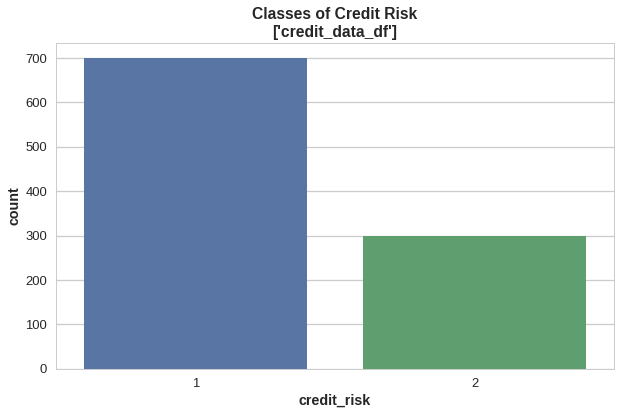

In [11]:
sns.countplot(x='credit_risk', data=credit_data_df)
plt.title('Classes of Credit Risk\n[\'credit_data_df\']')
plt.show()

### 3.2 Categorical Attributes

From the frequency tables below, among all the categorical variable values and their distribution among the two classes of credit risk, we can safely assume that all these attributes are important for the predictive model we are going to build. Of course, some attributes will be more important than others, but we better leave the machine learning algorithm to decide on that.

In [12]:
categ_attribs = list(credit_data_df.select_dtypes(include=['category']).columns)

Attribute: 'checking_acc_status':
------------------------------------
Check the uniqueness of 'checking_acc_status' attribute values...

Found 4 unique values in 1000 record lines.

Prints a frequency table of ('checking_acc_status', 'credit_risk') values...

                                 count  frequency
checking_acc_status credit_risk                  
none                1              348   0.497143
                    2               46   0.153333
overdraft           1              139   0.198571
                    2              135   0.450000
adequate            1              164   0.234286
                    2              105   0.350000
good                1               49   0.070000
                    2               14   0.046667




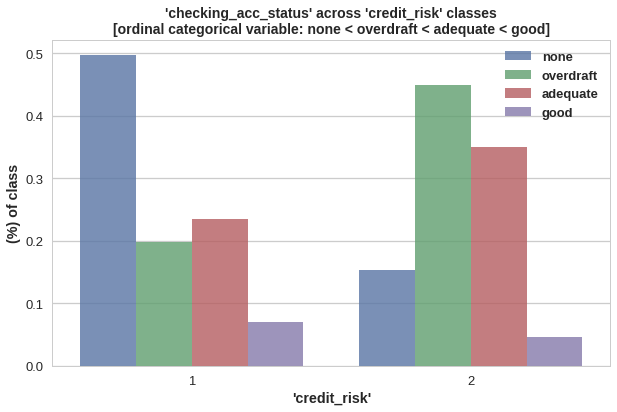

Attribute: 'credit_hist':
----------------------------
Check the uniqueness of 'credit_hist' attribute values...

Found 5 unique values in 1000 record lines.

Prints a frequency table of ('credit_hist', 'credit_risk') values...

                         count  frequency
credit_hist credit_risk                  
none        1               15   0.021429
            2               25   0.083333
Paid-Off    1               21   0.030000
            2               28   0.093333
Serviced    1              361   0.515714
            2              169   0.563333
Delayed     1               60   0.085714
            2               28   0.093333
Critical    1              243   0.347143
            2               50   0.166667




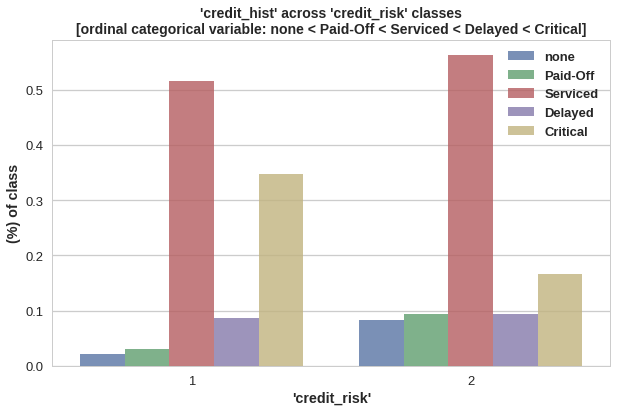

Attribute: 'loan_purpose':
-----------------------------
Check the uniqueness of 'loan_purpose' attribute values...

Found 10 unique values in 1000 record lines.

Prints a frequency table of ('loan_purpose', 'credit_risk') values...

                                   count  frequency
loan_purpose          credit_risk                  
business              1               63   0.090000
                      2               34   0.113333
car (new)             1              145   0.207143
                      2               89   0.296667
car (used)            1               86   0.122857
                      2               17   0.056667
domestic appliances   1                8   0.011429
                      2                4   0.013333
education             1               28   0.040000
                      2               22   0.073333
furniture / equipment 1              123   0.175714
                      2               58   0.193333
others                1               

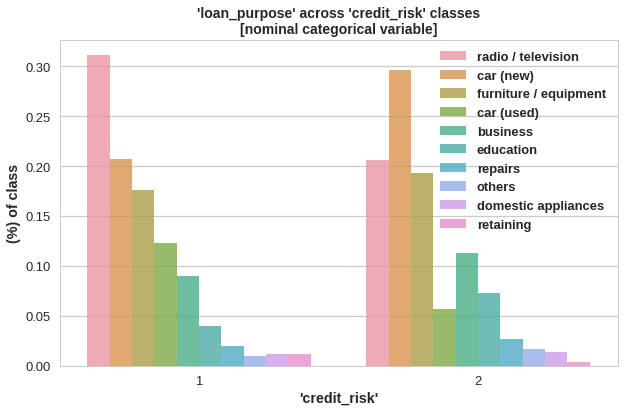

Attribute: 'consecutive_emp':
--------------------------------
Check the uniqueness of 'consecutive_emp' attribute values...

Found 5 unique values in 1000 record lines.

Prints a frequency table of ('consecutive_emp', 'credit_risk') values...

                             count  frequency
consecutive_emp credit_risk                  
E0              1               39   0.055714
                2               23   0.076667
E1              1              102   0.145714
                2               70   0.233333
E4              1              235   0.335714
                2              104   0.346667
E7              1              135   0.192857
                2               39   0.130000
E7+             1              189   0.270000
                2               64   0.213333




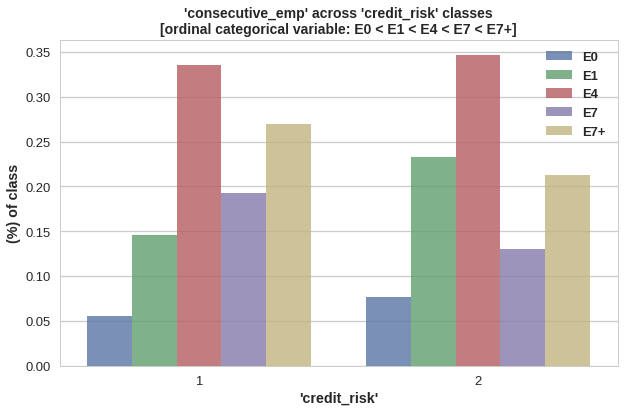

Attribute: 'sex_personal_status':
------------------------------------
Check the uniqueness of 'sex_personal_status' attribute values...

Found 4 unique values in 1000 record lines.

Prints a frequency table of ('sex_personal_status', 'credit_risk') values...

                                 count  frequency
sex_personal_status credit_risk                  
F1                  1              201   0.287143
                    2              109   0.363333
M0                  1              402   0.574286
                    2              146   0.486667
M1                  1               67   0.095714
                    2               25   0.083333
M2                  1               30   0.042857
                    2               20   0.066667




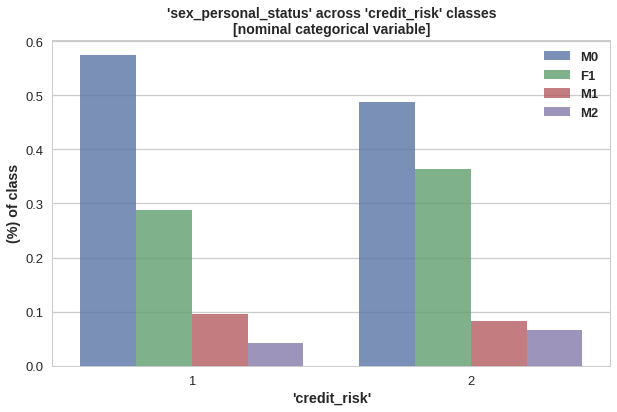

Attribute: 'other_debtors_guarantors':
-----------------------------------------
Check the uniqueness of 'other_debtors_guarantors' attribute values...

Found 3 unique values in 1000 record lines.

Prints a frequency table of ('other_debtors_guarantors', 'credit_risk') values...

                                      count  frequency
other_debtors_guarantors credit_risk                  
co-applicant             1               23   0.032857
                         2               18   0.060000
guarantor                1               42   0.060000
                         2               10   0.033333
none                     1              635   0.907143
                         2              272   0.906667




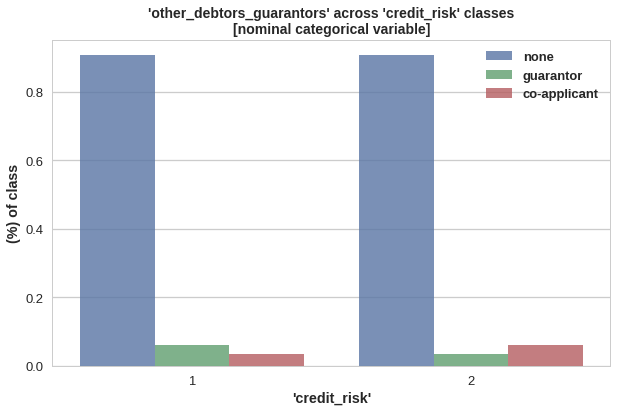

Attribute: 'property_type':
------------------------------
Check the uniqueness of 'property_type' attribute values...

Found 4 unique values in 1000 record lines.

Prints a frequency table of ('property_type', 'credit_risk') values...

                                                                count  \
property_type                                      credit_risk          
building society saving agreement / life-insurance 1              161   
                                                   2               71   
car / other                                        1              230   
                                                   2              102   
real estate                                        1              222   
                                                   2               60   
unknown / no-property                              1               87   
                                                   2               67   

                                

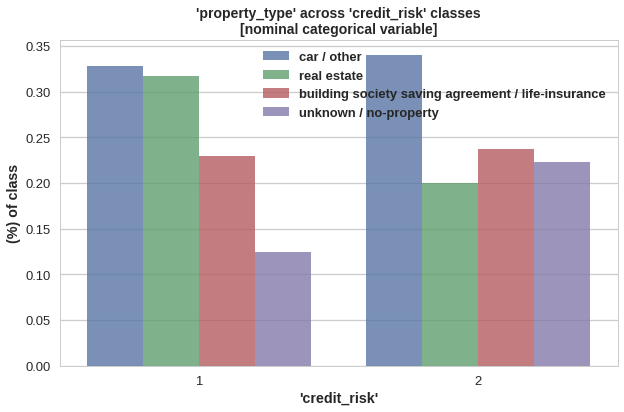

Attribute: 'other_installment_plans':
----------------------------------------
Check the uniqueness of 'other_installment_plans' attribute values...

Found 3 unique values in 1000 record lines.

Prints a frequency table of ('other_installment_plans', 'credit_risk') values...

                                     count  frequency
other_installment_plans credit_risk                  
bank                    1               82   0.117143
                        2               57   0.190000
none                    1              590   0.842857
                        2              224   0.746667
stores                  1               28   0.040000
                        2               19   0.063333




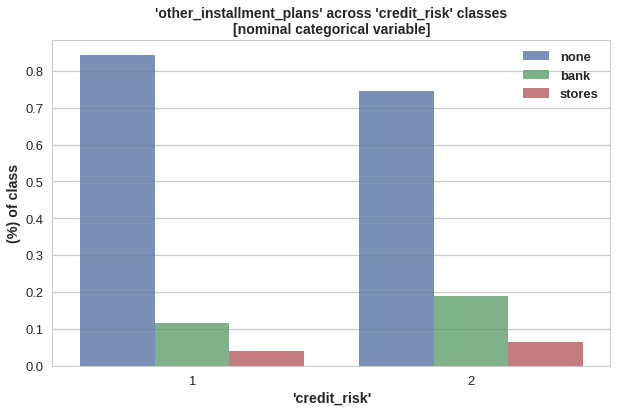

Attribute: 'housing_type':
-----------------------------
Check the uniqueness of 'housing_type' attribute values...

Found 3 unique values in 1000 record lines.

Prints a frequency table of ('housing_type', 'credit_risk') values...

                          count  frequency
housing_type credit_risk                  
guest        1               64   0.091429
             2               44   0.146667
rent         1              109   0.155714
             2               70   0.233333
own          1              527   0.752857
             2              186   0.620000




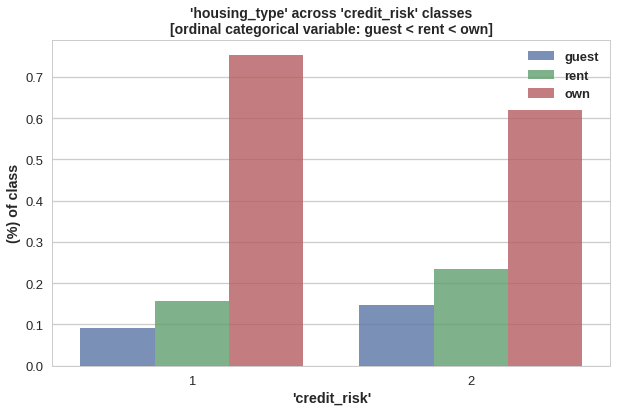

Attribute: 'work_experience':
--------------------------------
Check the uniqueness of 'work_experience' attribute values...

Found 4 unique values in 1000 record lines.

Prints a frequency table of ('work_experience', 'credit_risk') values...

                             count  frequency
work_experience credit_risk                  
D               1               15   0.021429
                2                7   0.023333
C               1              144   0.205714
                2               56   0.186667
B               1              444   0.634286
                2              186   0.620000
A               1               97   0.138571
                2               51   0.170000




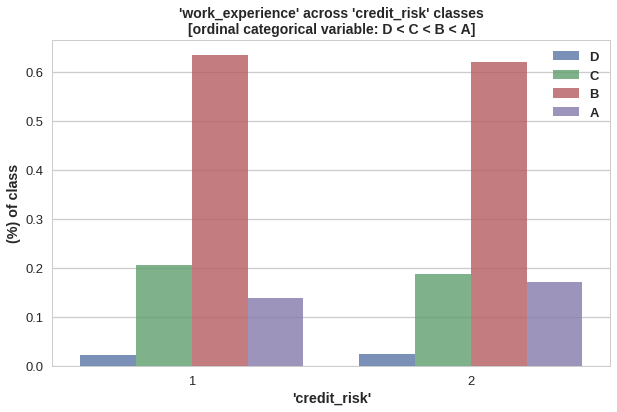

Attribute: 'phone_exist':
----------------------------
Check the uniqueness of 'phone_exist' attribute values...

Found 2 unique values in 1000 record lines.

Prints a frequency table of ('phone_exist', 'credit_risk') values...

                         count  frequency
phone_exist credit_risk                  
no          1              409   0.584286
            2              187   0.623333
yes         1              291   0.415714
            2              113   0.376667




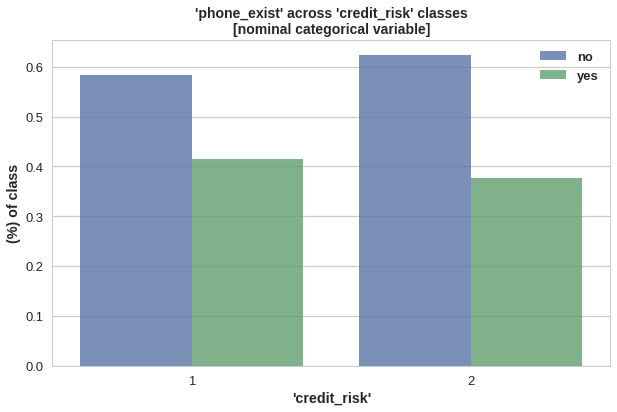

Attribute: 'foreign_worker':
-------------------------------
Check the uniqueness of 'foreign_worker' attribute values...

Found 2 unique values in 1000 record lines.

Prints a frequency table of ('foreign_worker', 'credit_risk') values...

                            count  frequency
foreign_worker credit_risk                  
no             1               33   0.047143
               2                4   0.013333
yes            1              667   0.952857
               2              296   0.986667




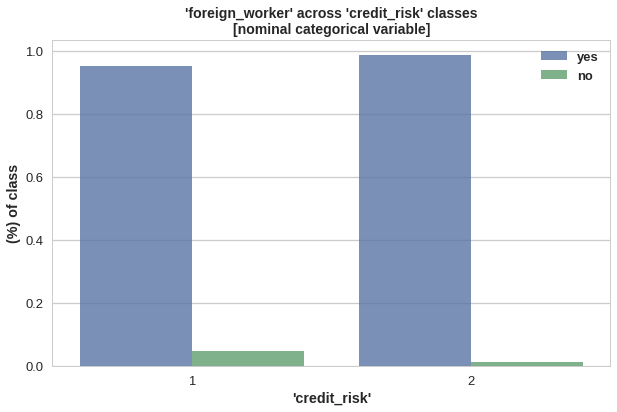

In [13]:
# Frequency tables and barplots of categorical attributes
# to depict their distribution among the two classes of credit risk
freq_tables(credit_data_df, categ_attribs, 'credit_risk', 
            barplot=True, matplotlib_style='seaborn-whitegrid')

In [14]:
# Keep the important categorical attributes in a separate list
imp_categ_attribs = categ_attribs
imp_categ_attribs

['checking_acc_status',
 'credit_hist',
 'loan_purpose',
 'consecutive_emp',
 'sex_personal_status',
 'other_debtors_guarantors',
 'property_type',
 'other_installment_plans',
 'housing_type',
 'work_experience',
 'phone_exist',
 'foreign_worker']

### 3.3 Integer Attributes

From the boxplot diagrams below, depicting the distribution of the integer variables values across the two classes of credit risk, we can safely exlude from our consideration the attributes below:

* **`'present_residence_since'`**
* **`'credits_at_bank'`**
* **`'num_people_liable'`**

These attributes do not seem to be influencive for the response variable, **`'credit_risk'`**, we want to predict.

In [15]:
int_attribs = list(credit_data_df.select_dtypes(include=['int']).columns)

In [16]:
credit_data_df[int_attribs].describe()

,loan_duration,present_residence_since,age,credits_at_bank,num_people_liable
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,2.845000,35.546000,1.407000,1.155000
std,12.058814,1.103718,11.375469,0.577654,0.362086
min,4.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,4.000000,75.000000,4.000000,2.000000


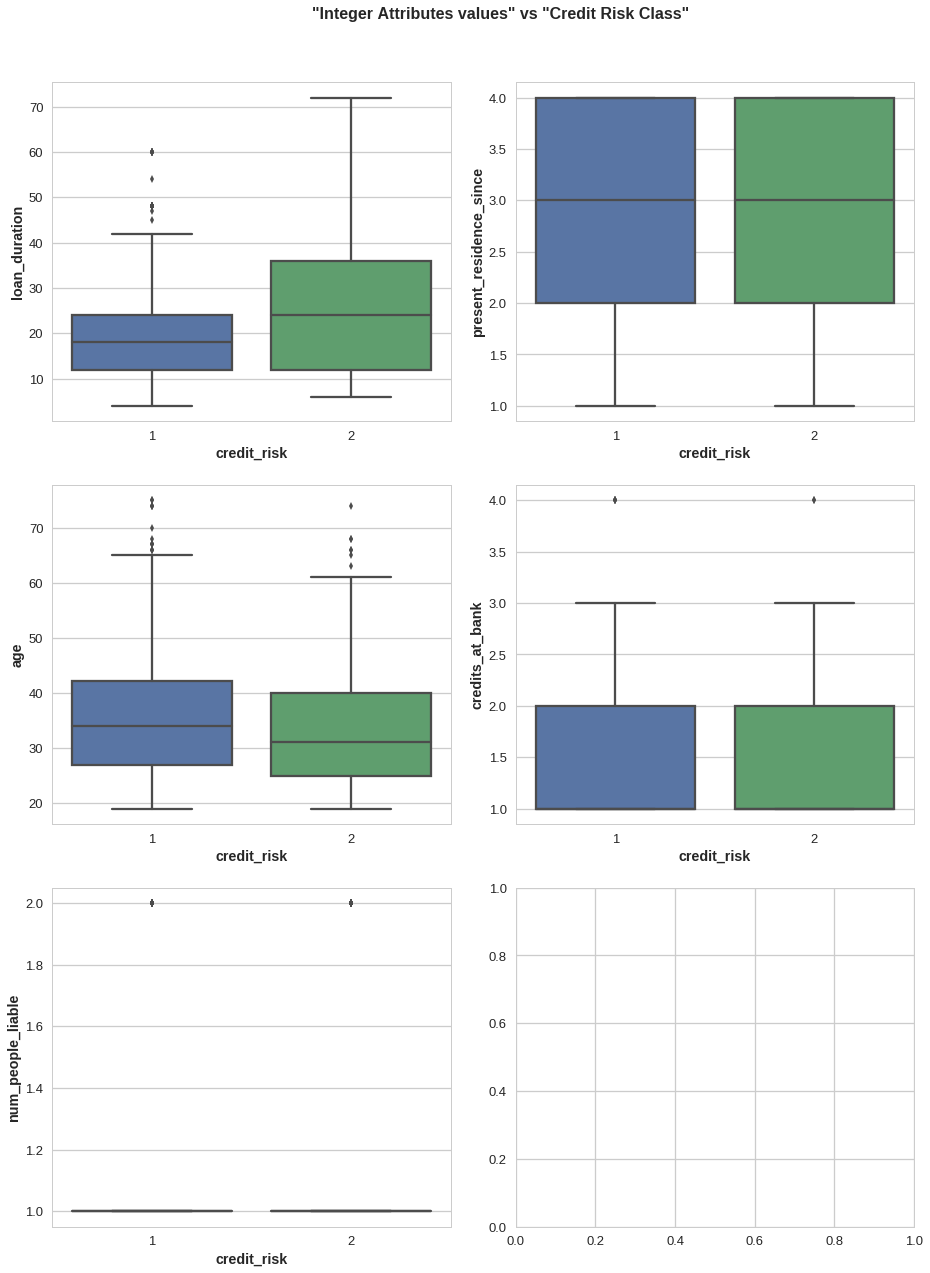

In [17]:
# Plot the Boxplot of all the int_attribs vs the "credit_risk" class ("1"/"2")
fig, axes  = plt.subplots(nrows=3, ncols=2, figsize=(14, 6*3))
axes_coord = [(i,j) for i in range(3) for j in range(2)]
for attrib in int_attribs:
    sns.boxplot(x='credit_risk', y=attrib, data=credit_data_df, ax=axes[axes_coord.pop(0)])

fig.tight_layout(h_pad=2, w_pad=2, rect=[0, 0, 0.93, 0.93])
fig.suptitle('\"Integer Attributes values\" vs \"Credit Risk Class\"',
             fontsize=16, fontweight='bold')
plt.show()

In [18]:
# Keep the important integer attributes in a separate
imp_int_attribs = int_attribs
imp_int_attribs.remove('present_residence_since')
imp_int_attribs.remove('credits_at_bank')
imp_int_attribs.remove('num_people_liable')
imp_int_attribs

['loan_duration', 'age']

### 3.4 Float Attributes

From the boxplot diagrams below, and the frequency tables concerning the distribution of the **`'installment_rate'`** and **`'savings'`** values across the two classes of credit risk, we can safely assume that all these attributes are important. Furthermore, we better descritize the **`'savings'`** values into quartiles as shown below, and use it in this form in order to train the machine learning algorithm of choice.

In [19]:
float_attribs = list(credit_data_df.select_dtypes(include=['float']).columns)

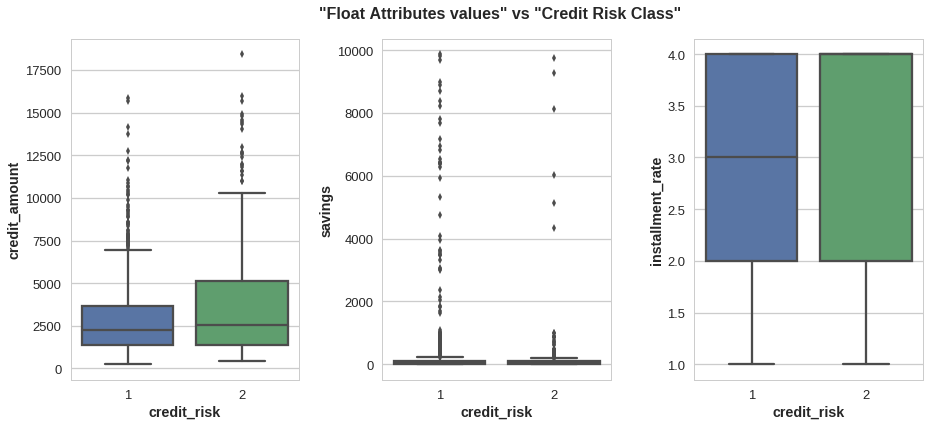

In [20]:
# Plot the Boxplot of all the "float_attribs" vs the "credit_risk" class ("1"/"2")
fig, axes  = plt.subplots(nrows=1, ncols=3, figsize=(14, 6))
axes_coord = [(i) for i in range(3)]
for attrib in float_attribs:
    sns.boxplot(x='credit_risk', y=attrib, data=credit_data_df, ax=axes[axes_coord.pop(0)])

fig.tight_layout(h_pad=2, w_pad=2, rect=[0, 0, 0.93, 0.93])
fig.suptitle('\"Float Attributes values\" vs \"Credit Risk Class\"',
             fontsize=16, fontweight='bold')
plt.show()

#### Relevance of `'Installment_rate'` attribute

** => Important**

Attribute: 'installment_rate':
---------------------------------
Check the uniqueness of 'installment_rate' attribute values...

Found 4 unique values in 1000 record lines.

Prints a frequency table of ('installment_rate', 'credit_risk') values...

                              count  frequency
installment_rate credit_risk                  
1.0              1              102   0.145714
                 2               34   0.113333
2.0              1              169   0.241429
                 2               62   0.206667
3.0              1              112   0.160000
                 2               45   0.150000
4.0              1              317   0.452857
                 2              159   0.530000




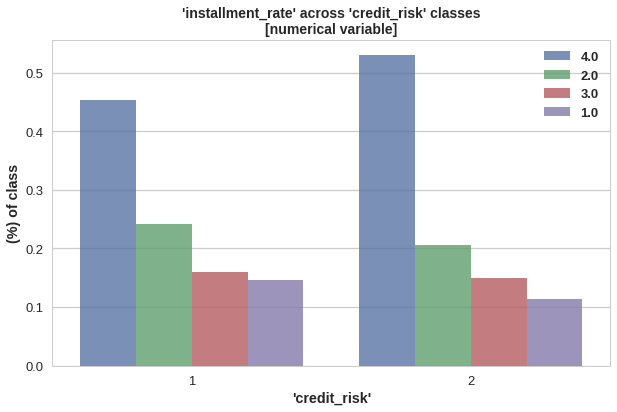

In [21]:
freq_tables(credit_data_df, ['installment_rate'], 'credit_risk',
            barplot=True, matplotlib_style='seaborn-whitegrid')

#### Relevance of `'savings'` attribute

** => Important **

In [22]:
credit_data_df['savings_factor'], bins = pd.qcut(credit_data_df['savings'],
                                           [0, .25, .50, .75, 1], retbins=True,
                                           labels=['Q1', 'Q2', 'Q3', 'Q4'])

print('1st-quartile: [%.2f, %.2f] EUR in \'savings\'' % (bins[0], bins[1]))
print('2nd-quartile: (%.2f, %.2f] EUR in \'savings\'' % (bins[1], bins[2]))
print('3rd-quartile: (%.2f, %.2f] EUR in \'savings\'' % (bins[2], bins[3]))
print('4th-quartile: (%.2f, %.2f] EUR in \'savings\'' % (bins[3], bins[4]))

1st-quartile: [0.00, 9.64] EUR in 'savings'
2nd-quartile: (9.64, 54.04] EUR in 'savings'
3rd-quartile: (54.04, 93.85] EUR in 'savings'
4th-quartile: (93.85, 9873.34] EUR in 'savings'


Attribute: 'savings_factor':
-------------------------------
Check the uniqueness of 'savings_factor' attribute values...

Found 4 unique values in 1000 record lines.

Prints a frequency table of ('savings_factor', 'credit_risk') values...

                            count  frequency
savings_factor credit_risk                  
Q1             1              198   0.282857
               2               52   0.173333
Q2             1              160   0.228571
               2               90   0.300000
Q3             1              158   0.225714
               2               92   0.306667
Q4             1              184   0.262857
               2               66   0.220000




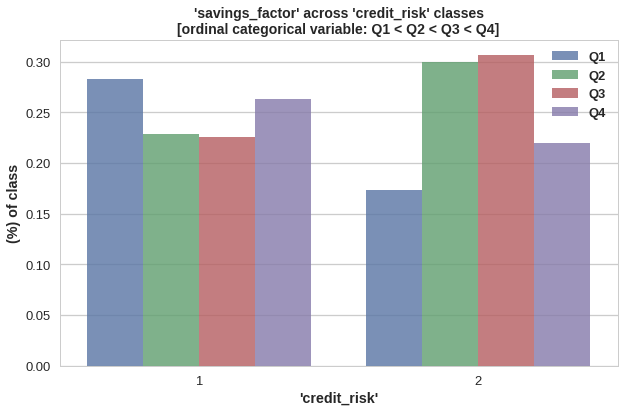

In [23]:
freq_tables(credit_data_df, ['savings_factor'], 'credit_risk',
            barplot=True,  matplotlib_style='seaborn-whitegrid')

In [24]:
# Keep the important float attributes in a separate list
imp_float_attribs = float_attribs
imp_float_attribs.remove('savings')
imp_float_attribs

['credit_amount', 'installment_rate']

In [25]:
# Update the important categorical attributes with the new "savings_factor"
imp_categ_attribs = list(credit_data_df.select_dtypes(include=['category']).columns)

## 4. Model Training and Evaluation

### 4.1 Machine Learning Algorithms to use

From the discussion above, we conclude that the useful part of the provided data set has only two integer variables, i.e. **`'loan_duration'`** and **`'age'`** of customer, two float attributes, i.e. **`'credit_amount'`** and **`'installment_rate'`**, whereas all the others attributes are nominal or ordinal categorical variables. The business question we have to answer, on the other hand, namely to accurately predict the credit risk class of a client (represented by a record line here) is a simple, binary classification problem. Therefore, decission tree classification algorithms, or ensembles build on top of these algorithms (e.g. **Random Forest** or **Extremely Randomized Trees**), are expected to provide high predictive performance for this kind of task.

In [26]:
response = 'credit_risk'
imp_attribs = imp_categ_attribs + imp_int_attribs + imp_float_attribs

In [27]:
credit_data_df[imp_attribs + [response]].head()

,checking_acc_status,credit_hist,loan_purpose,consecutive_emp,sex_personal_status,other_debtors_guarantors,property_type,other_installment_plans,housing_type,work_experience,phone_exist,foreign_worker,savings_factor,loan_duration,age,credit_amount,installment_rate,credit_risk
0,overdraft,Critical,radio / television,E7+,M0,none,real estate,none,own,B,yes,yes,Q1,6,67,1169.54,4.0,1
1,adequate,Serviced,radio / television,E4,F1,none,real estate,none,own,B,no,yes,Q2,48,22,5951.76,2.0,2
2,none,Critical,education,E7,M0,none,real estate,none,own,C,no,yes,Q2,12,49,2096.53,2.0,1
3,overdraft,Serviced,furniture / equipment,E7,M0,guarantor,building society saving agreement / life-insur...,none,guest,B,no,yes,Q2,42,45,7882.18,2.0,1
4,overdraft,Delayed,car (new),E4,M0,none,unknown / no-property,none,guest,B,no,yes,Q3,24,53,4870.38,3.0,2


### 4.2 Prepare the provided data set:

### Split the `"credit_data_df"`: `"train"` & `"test"` part

Next, we prepare the provided data set for the scikit-learn classifiers. This requires to appropriately encode the categorical variables and split the provided data into two parts, a training and a test set. Note, that due to the class imbalance of the problem, we apply the **`StratifiedKFold`** method to take this fact into account. In addition, by choosing the **`'shuffle=True'`** flag, we eliminate the possibility of a data ordering that is not arbitrary (e.g. samples with the same class label being contiguous). The samples are independently and identically distributed in this case, which makes shuffling an additional possibility to get a meaningful cross-validation result.

In [28]:
RANDOM_STATE = 1234

# Encode the Categorical Variables
le = LabelEncoder()
credit_data_df1 = credit_data_df[imp_attribs + [response]].copy()

for attrib in imp_categ_attribs:
    credit_data_df1.loc[:,attrib] = le.fit_transform(credit_data_df1[attrib].values)

# Split the Attribute from the Response variables
X = credit_data_df1[imp_attribs]
y = credit_data_df1[response].astype(int)

# Split the provided data set in a "train" and a "test" part
skf = StratifiedKFold(n_splits=2,shuffle=True, random_state=RANDOM_STATE)

for train_ix, test_ix in skf.split(X, y):
    X_train, X_test = X.loc[train_ix,:], X.loc[test_ix,:]
    y_train, y_test = y[train_ix], y[test_ix]

### 4.3 Model Training and Cross-Validated Evaluation

#### A. Decision Tree (`"dtree"`)

It is important to note that the *provided* **cost matrix**:

\                    |**Predicted**
---------------------|-----------------------------------------
**Actual**           |**Good (`'1'`) [P]**|** Bad (`'2'`) [N]**
**Good (`'1'`) [P]** |**0** [TP]          |**1** [FN]
**Bad (`'2'`) [N]**  |**5** [FP]          |**0** [TN]

which can help us better quantify the misclassifications of **Good (`'1'`)** and **Bad Credit Risks (`'2'`)**, can be nicely considered in the so-called **$F_{\beta}$ score** for $\beta=\frac{1}{\sqrt{5}}$,

$$
F_{\left(\beta=\frac{1}{\sqrt{5}}\right)}= 
(1+\beta^{2})\cdot
\frac{\mathit{precision}\times\mathit{recall}}{(\beta^{2}\cdot\mathit{precision}) + \mathit{recall}}\,,
$$

where
$$
\mathit{precision} = \frac{TP}{TP + FP}\,,\qquad \mathit{recall}=\frac{TP}{TP + FN}\,.
$$


Indeed, since we consider here the **Good Credit Risk (`'1'`)** as the **positive class [P]**, the *provided* **cost matrix** calls for a $\mathit{precision}$ function that should be weighted five times higher than the $\mathit{recall}$ function. To see why this is true for $F_{\beta=1/\sqrt{5}}$, recall that the **F-measure**, $F_{\beta}$, is related with the  **Van Rijsbergen's effectiveness measure**, $E$, as below:

$$
F_{\beta} = 1 - E\,,
$$

where

$$
E = 1 - \left(\frac{\alpha}{\mathit{precision}} + \frac{1-\alpha}{\mathit{recall}}\right)^{-1}\,,\qquad
\alpha=\frac{1}{1+\beta^{2}}\,.
$$

Best Estimaror found by "GridSearchCV":

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=345, splitter='best')

Best Parameters found by "GridSearchCV":

{'max_depth': 6, 'min_samples_leaf': 2, 'max_features': None}

Best "F_beta Score" (beta = 1/sqrt{5}) found by "GridSearchCV [train set]": 0.7914

"F_beta Score" (beta = 1/sqrt{5}) [test set]: 0.7704


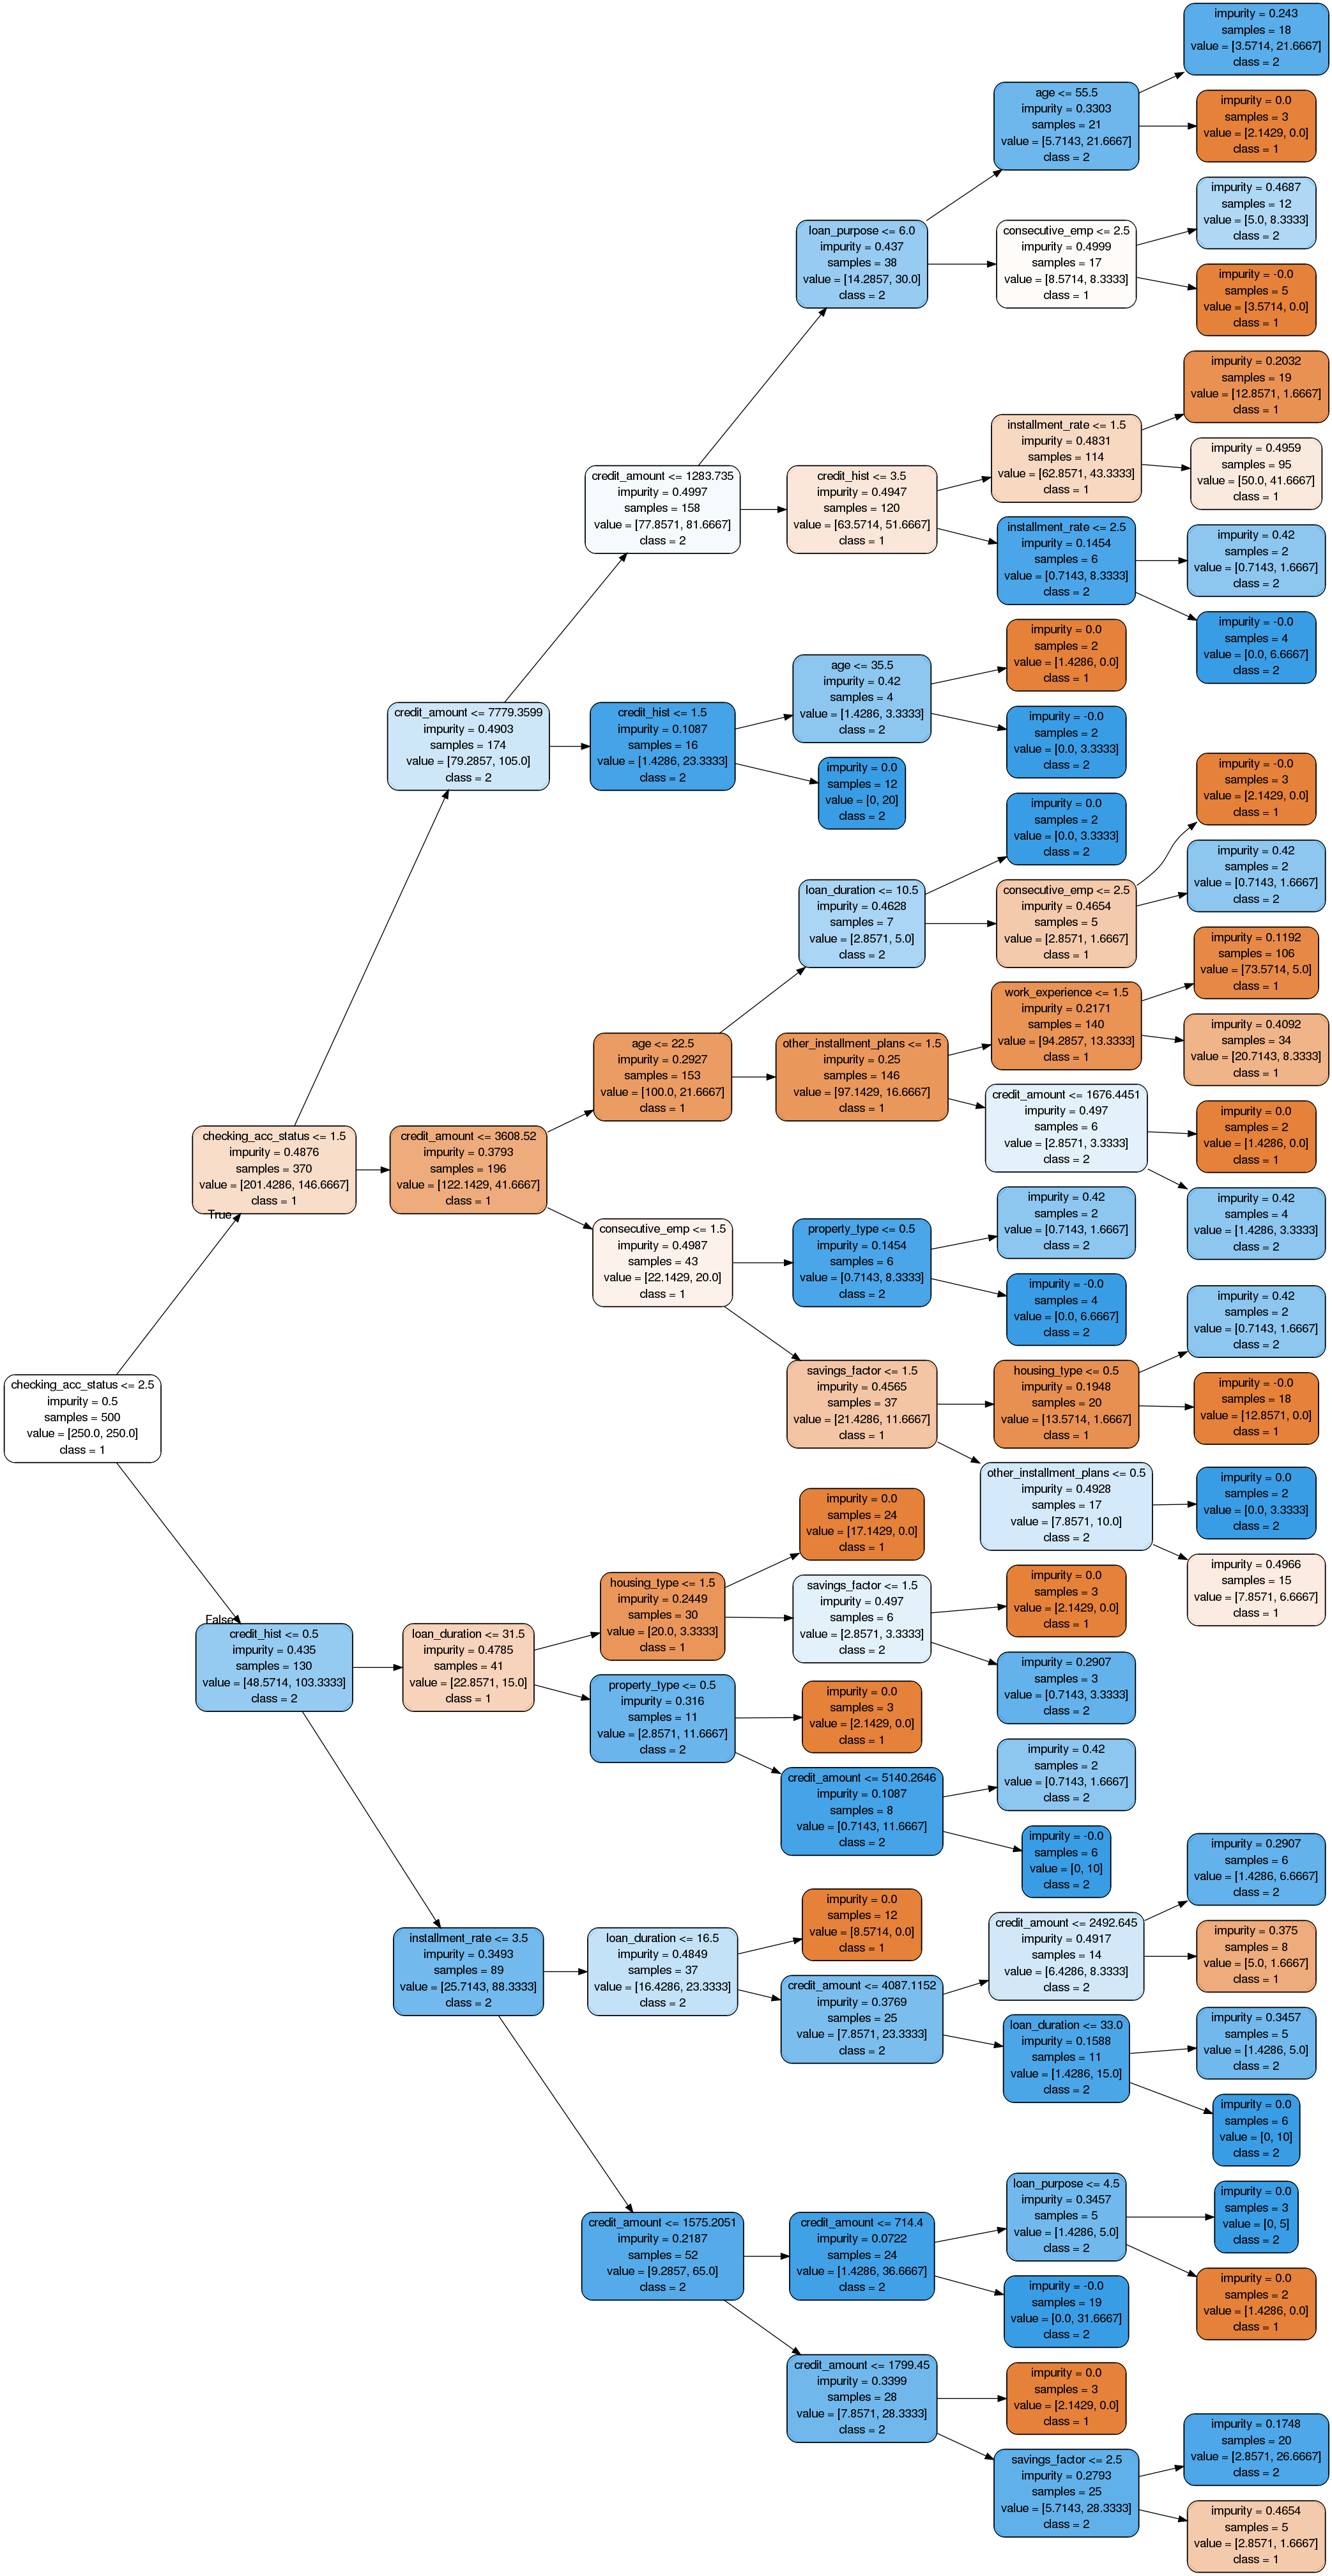

In [29]:
RANDOM_STATE = 345

# Instantiate a simple DTree to fit
dtree = tree.DecisionTreeClassifier(class_weight='balanced',
                                    random_state=RANDOM_STATE)

# Determine a Parameter Grid 
# to better investigate their adequacy for the DTree defined above
param_grid = {'max_depth': [3, 4, 5, 6],
              'min_samples_leaf': [5, 4, 3, 2, 1],
              'max_features': [None, 'sqrt']}

# Define the scoring function of interest
betaSq = 1/5
fb_score = make_scorer(fbeta_score, beta=np.sqrt(betaSq), pos_label=1, average='binary')

# Instantiate the "GridSearchCV" method
grid0 = GridSearchCV(dtree, param_grid, scoring=fb_score, cv=5, iid=True)

# Perform the Parameter Grid Search
grid0.fit(X_train, y_train)

# Return the results found
print('Best Estimaror found by "GridSearchCV":\n\n%s' % grid0.best_estimator_)
print('\nBest Parameters found by "GridSearchCV":\n\n%s' % grid0.best_params_)
print('\nBest "F_beta Score" (beta = 1/sqrt{5}) found by "GridSearchCV [train set]": %.4f' % grid0.best_score_)

# Provide the F_beta score using the test case
y_pred = grid0.predict(X_test)
fbeta_score_test = fbeta_score(y_test, y_pred, beta=np.sqrt(betaSq), pos_label=1, average='binary')
print('\n"F_beta Score" (beta = 1/sqrt{5}) [test set]: %.4f' % fbeta_score_test)

# Export a Graphical Visualization of the fitted "dtree" by the "GridSearchCV" method
import pydotplus
from IPython.display import Image

dot_data = tree.export_graphviz(grid0.best_estimator_.tree_, out_file=None,
                                feature_names=imp_attribs,
                                class_names=credit_data_df1.credit_risk,
                                rotate=True, filled=True, rounded=True,special_characters=False)

graph = pydotplus.graph_from_dot_data(dot_data)
#graph.write_pdf('./credit_data_DT.pdf')
Image(graph.create_png())

#### B. Averaging Ensemble Methods (Random Forest &  Extremely Randomized Trees)

First, we compare which averaging ensemble method performs best, and find the required number of estimators to ***reach a plateau*** of **OOB Error**.


Training: RandomForestClassifier, max_features='sqrt'
---------------------------------------------------------

Training: ExtraTreesClassifier, max_features='sqrt'
-------------------------------------------------------


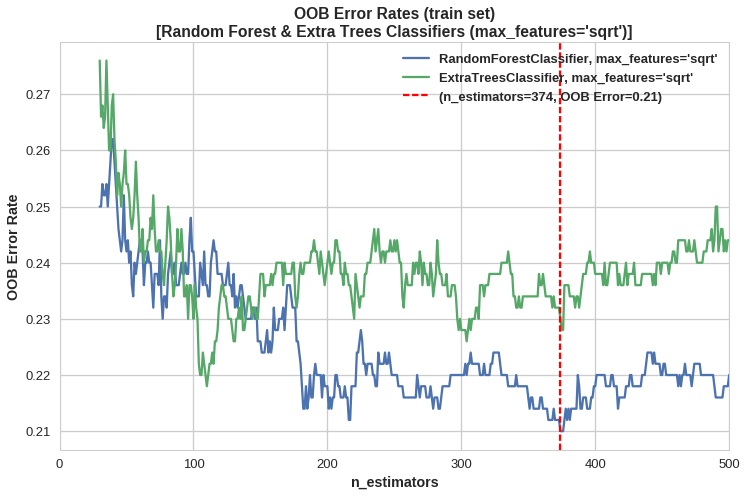

In [30]:
from collections import OrderedDict
RANDOM_STATE = 345

# Range of "n_estimators" values to explore.
min_estimators = 30
max_estimators = 500

# Instantiate the Ensemble Classifiers of interest
ensemble_clfs = [("RandomForestClassifier, max_features='sqrt'",
                  RandomForestClassifier(max_features='sqrt',
                                         max_depth=None, min_samples_leaf=1,
                                         warm_start=True, bootstrap=True, oob_score=True,
                                         random_state=RANDOM_STATE)),
                 ("ExtraTreesClassifier, max_features='sqrt'",
                  ExtraTreesClassifier(max_features='sqrt',
                                       max_depth=None, min_samples_leaf=1,
                                       warm_start=True, bootstrap=True, oob_score=True,
                                       random_state=RANDOM_STATE))]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

for label, clf in ensemble_clfs:
    s = '\nTraining: %s' % label
    print(s)
    print('-' * (len(s) + 3))

    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)
        # Record the OOB Error Rate returned 
        # by Classifier for each "n_estimators=i" setting
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot
plt.figure(figsize=(12, 7.5))
ys_min = 1; ys_max = 0
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    clf_err_nd = np.array(clf_err)
    label_ys_min = clf_err_nd[:,1].min(); label_ys_max = clf_err_nd[:,1].max()
    label_xs0 = clf_err_nd[clf_err_nd[:,1].argmin(),0]
    if label_ys_min < ys_min:
        ys_min = min([ys_min, label_ys_min])
        xs0 = label_xs0
    ys_max = max([ys_max, label_ys_max])
    plt.plot(xs, ys, '-', label=label)

plt.axvline(x=xs0, color='r', linestyle='dashed', 
           label=r'(n_estimators=%d, OOB Error=%.2f)' % (xs0, ys_min))
plt.xlim(0, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB Error Rate")
plt.title('OOB Error Rates (train set)\n[Random Forest & Extra Trees Classifiers (max_features=\'sqrt\')]')
plt.legend(loc="upper right", prop={'weight':'bold'})
plt.show()

Next, we tune the averaging ensemble method which is found best by the OOB Error Rates plots above. This was the **Random Forest Classifier**. Note, that an improved **$F_{\beta}$ score** over the test set is now achieved, i.e. $F_{\beta=1/\sqrt{5}}~[{test~set}]=0.7748$, in comparison with the $F_{\beta=1/\sqrt{5}}~[{test~set}] = 0.7704$ we had earlier by appropriately fitting a simple decision tree.

In [31]:
# Tune the averaging ensemble method 
# that is found being best from the discussion above
label, clf = ensemble_clfs[0]
n_estimators = 400
clf.set_params(n_estimators=n_estimators, 
               max_features='sqrt')

print('Tuning the averaging ensemble method that is found being best by the OOB Error Rates plots...\n')
print(clf)

# Parameter Grid to better investigate for their adequacy
param_grid = {'max_depth': [3, 4, 5, 6, None],
              'min_samples_leaf': [5, 4, 3, 2, 1]}

# Define the scoring function of interest
betaSq = 1/5
fb_score = make_scorer(fbeta_score, beta=np.sqrt(betaSq), pos_label=1, average='binary')

# Instantiate the "GridSearchCV" method
grid1 = GridSearchCV(clf, param_grid, scoring=fb_score, cv=5, iid=True)

# Perform the Parameter Grid Search
grid1.fit(X_train, y_train)

# Return the results found
print('\nBest Estimaror found by "GridSearchCV":\n\n%s' % grid1.best_estimator_)
print('\nBest Parameters found by "GridSearchCV":\n%s' % grid1.best_params_)
print('\nBest "F_beta Score" (beta = 1/sqrt{5}) found by "GridSearchCV [train set]": %.4f' % grid1.best_score_)

# Provide the F_beta score using the test case
y_pred = grid1.predict(X_test)
fbeta_score_test = fbeta_score(y_test, y_pred, beta=np.sqrt(betaSq), pos_label=1, average='binary')
print('\n"F_beta Score" (beta = 1/sqrt{5}) [test set]: %.4f' % fbeta_score_test)

Tuning the averaging ensemble method that is found being best by the OOB Error Rates plots...

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=1, oob_score=True, random_state=345,
            verbose=0, warm_start=True)

Best Estimaror found by "GridSearchCV":

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=1, oob_score=True, random_state=345,
            verbose=0, warm_start=True)

Best Parameters found by "GridSearchCV":
{'max_depth': None, 'min_samples_leaf': 1}

Best "F_beta Sc

The **features importances** are also depicted in the barplot diagram below. The amount that has been credited by a customer, **`'credit_amount'`**, is the most important attribute for the predictive model we want to build, with her **`'age'`**, the **`'loan_duration'`**, the status of her checking account, **`'checking_acc_status'`**, and the credit history, **`'credit_hist'`**, she has so far, coming immediately after. Less, but also important are the attributes that has to do with the years of consecutive employment, **`'consecutive_emp'`**, the **`'loan_purpose'`**, its **`'installment_rate'`**, the **`'property_type'`**, the savings that currently exist in customer's account, **`'savings_factor'`**, her **`'sex_personal_status'`**, her **`'work_experience'`**, and finaly if she owns/rents or being a guest in a property, i.e. **`'housing_type'`**. Note however, that if a phone exists (**`'phone_exists'`**), and/or if the customer is a foreign worker or not (**`'foreign_worker'`**), do not seem to be important.

Feature Importance:
1. feature credit_amount (0.166811)
2. feature age (0.114352)
3. feature loan_duration (0.096324)
4. feature checking_acc_status (0.092230)
5. feature credit_hist (0.077797)
6. feature consecutive_emp (0.060057)
7. feature loan_purpose (0.058199)
8. feature installment_rate (0.052787)
9. feature property_type (0.048228)
10. feature savings_factor (0.045850)
11. feature sex_personal_status (0.042288)
12. feature work_experience (0.035748)
13. feature housing_type (0.030612)
14. feature other_debtors_guarantors (0.028411)
15. feature other_installment_plans (0.027244)
16. feature phone_exist (0.018455)
17. feature foreign_worker (0.004608)


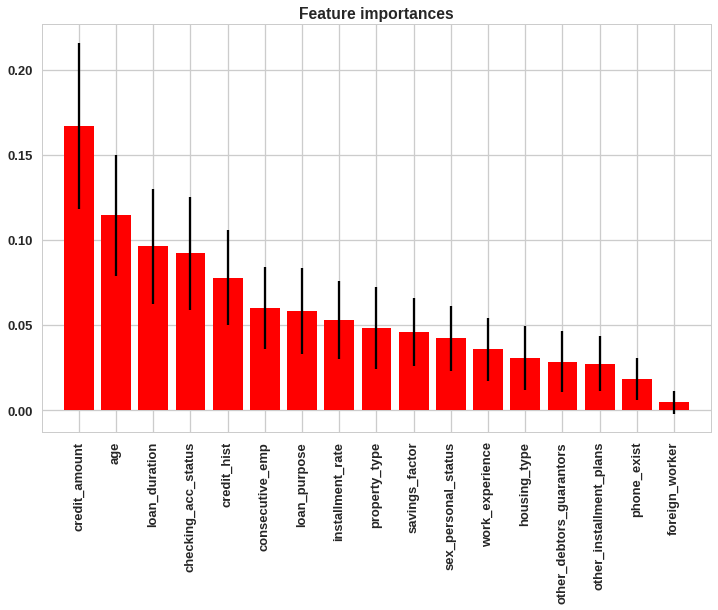

In [32]:
# Store the feature importances in a separate list
importances = grid1.best_estimator_.feature_importances_

# Compute the standard deviation of feature importances across all the "n_estimators"
std = np.std([tree.feature_importances_ for tree in grid1.best_estimator_.estimators_], axis=0)

# Sort in a descending order of importance the feature indices
importances_idx = np.argsort(importances)[::-1]

# Print the Feature Importance
print('Feature Importance:')

for f in range(X_train.shape[1]):
    print("%d. feature %s (%f)" %
          (f + 1, imp_attribs[importances_idx[f]], importances[importances_idx[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(12, 7.5))
plt.bar(range(X_train.shape[1]), importances[importances_idx],
       color='r', yerr=std[importances_idx], align='center')
plt.xticks(range(X_train.shape[1]), 
           [imp_attribs[i] for i in importances_idx], fontweight='bold',
           rotation='vertical')
plt.yticks(fontweight='bold')
plt.xlim([-1, X_train.shape[1]])
plt.title('Feature importances')
plt.show()

## 5. Predictions

Finally, we omit the non-important attributes from our training set, namely the **`'phone_exist'`** and **`'foreign_worker'`** variables, re-execute the **`GridSearchCV`** method as above, and provide predictions over the splitted **test set (`X_test`)**, using the best classifier which is returned by the procedure. The **$F_{\beta=1/\sqrt{5}}$ score** which is now achieved is even higher than before, i.e

$$
F_{\left(\beta=\frac{1}{\sqrt{5}}\right)}= 
(1+\beta^{2})\cdot
\frac{\mathit{precision}\times\mathit{recall}}{(\beta^{2}\cdot\mathit{precision}) + \mathit{recall}}=
0.7763\,,
$$

where
$$
\mathit{precision} = \frac{TP}{TP + FP}\,,\qquad \mathit{recall}=\frac{TP}{TP + FN}\,.
$$

but of course there is a lot room of further improvement...

In [33]:
# Tune the averaging ensemble method 
# that is found being best from the discussion above
label, clf = ensemble_clfs[0]
n_estimators = 400
clf.set_params(n_estimators=n_estimators, 
               max_features='sqrt')

print('Tuning the averaging ensemble method that is found being best by the OOB Error Rates plots...\n')
print(clf)

# Parameter Grid to better investigate for their adequacy
param_grid = {'max_depth': [3, 4, 5, 6, None],
              'min_samples_leaf': [5, 4, 3, 2, 1]}

# Define the scoring function of interest
betaSq = 1/5
fb_score = make_scorer(fbeta_score, beta=np.sqrt(betaSq), pos_label=1, average='binary')

# Instantiate the "GridSearchCV" method
grid1 = GridSearchCV(clf, param_grid, scoring=fb_score, cv=5, iid=True)

# Perform the Parameter Grid Search:
# Omitting the not important attributes from the training set
grid1.fit(X_train.drop(['phone_exist', 'foreign_worker'], axis=1), y_train)

# Return the results found
print('\nBest Estimaror found by "GridSearchCV":\n\n%s' % grid1.best_estimator_)
print('\nBest Parameters found by "GridSearchCV":\n%s' % grid1.best_params_)
print('\nBest "F_beta Score" (beta = 1/sqrt{5}) found by "GridSearchCV [train set]": %.4f' % grid1.best_score_)

# Provide the F_beta score using the test case
y_pred = grid1.predict(X_test.drop(['phone_exist', 'foreign_worker'], axis=1))
fbeta_score_test = fbeta_score(y_test, y_pred, beta=np.sqrt(betaSq), pos_label=1, average='binary')
print('\n"F_beta Score" (beta = 1/sqrt{5}) [test set]: %.4f' % fbeta_score_test)

Tuning the averaging ensemble method that is found being best by the OOB Error Rates plots...

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=1, oob_score=True, random_state=345,
            verbose=0, warm_start=True)

Best Estimaror found by "GridSearchCV":

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=1, oob_score=True, random_state=345,
            verbose=0, warm_start=True)

Best Parameters found by "GridSearchCV":
{'max_depth': None, 'min_samples_leaf': 1}

Best "F_beta Sc